# Gaussian Density Function

$$p(x|\mu, \Sigma) = \frac{1}{(2\pi)^{n/2} |\Sigma|^{1/2}} exp(=\frac{1}{2}(x - \mu)^T\Sigma^{-1}(x - \mu))$$

In [7]:
import numpy as np
import pandas as pd
from sklearn import datasets 
from sklearn.cluster import KMeans
from sklearn import preprocessing

In [8]:
iris = datasets.load_iris()
X = iris.data
print(X.shape)

(150, 4)


In [38]:
x, y, z = np.linalg.svd(X)
print(x.shape)

(178, 178)


In [24]:
data = pd.read_csv('examples/module7_EM-GMM/wine.csv',header=None).to_numpy()
y = data[:,0]
data = data[:,1:]

print(f"data {data.shape}")

ndata = preprocessing.scale(data)
m, n = ndata.shape
C = np.matmul(ndata.T, ndata)/m

# pca the data
d = 2  # reduced dimension
V,_,_ = np.linalg.svd(C)
#V = V[:, :d]

data (178, 13)


In [21]:
V.shape

(13, 13)

In [33]:
X = ndata.dot(V)

In [44]:
mu = V.T.dot(np.mean(ndata, axis=0))
mu.shape

(13,)

In [43]:
maxIter = 20
sum_all = 0
for i in range(maxIter):
    c = X[:, i] - mu[i]

SyntaxError: invalid syntax (3290120398.py, line 3)

In [39]:
def gpdf(x, mu, C):
    
    V, _, _ = np.linalg.svd(C)
    
    x = x.dot(V)
    
    mu = vecs.T.dot(mu)
    
    sum_all = 0
    for i in range(maxIter):
        
        c = x[:, i]  - mu[i]
        sum_all += c**2 / vals[i]
    
    a = 1 / np.sqrt(sum(vals)) * np.exp(-.5*sum_all).reshap(-1, 1)
    
    return a.real

In [55]:
def gaussian(X, mu, cov):
    
        
    vals, vecs = np.linalg.eig(cov)
    
    vecs = vecs[:,np.argsort(-vals)][:,:20]
    vals = vals[np.argsort(-vals)][:20]
    from scipy.spatial import distance
    
    X= X.dot(vecs)

    mu = vecs.T.dot(mu)

    sum_all = 0
    for i in range(20):
        c = X[:,i]-mu[i]
        sum_all += c**2/vals[i]

        
    a = 1 / np.sqrt(sum(vals)) * np.exp(-0.5*sum_all ).reshape(-1, 1)
    
    return a.real

In [56]:
iris = datasets.load_iris()
X = iris.data
print(X.shape)

x0 = np.array([[0.05, 1.413, 0.212], [0.85, -0.3, 1.11], [11.1, 0.4, 1.5], [0.27, 0.12, 1.44], [88, 12.33, 1.44]])

mu = np.mean(X, axis=0)
print (mu.shape)
cov = np.cov(X,rowvar=False)
print (cov.shape)
print (X.shape)
y = gaussian(X, mu=mu, cov=cov)
y

(150, 4)
(4,)
(4, 4)
(150, 4)


IndexError: index 4 is out of bounds for axis 1 with size 4

# step 1


In [42]:
def init_params(X, k):
    
    clusters = []
    
    for i in range(k):
        clusters.append({
            'pi_k': 1.0 / k,
            'mu_k': np.random.normal(0, 0.1, 784),
            'cov_k': np.identity(X.shape[1], dtype=np.float64)
        })
        
    return clusters

In [57]:
n_clusters = 2


# LAst resort

ndata (178, 13)
v (13, 2)
second pdata (178, 2)
-----iteration--- 0


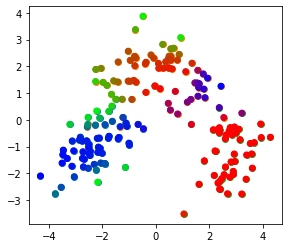

-----iteration--- 1


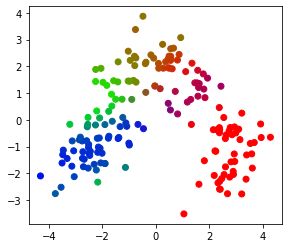

-----iteration--- 2


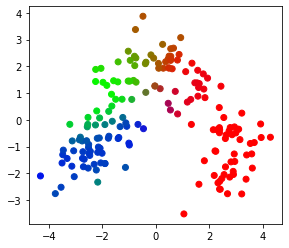

-----iteration--- 3


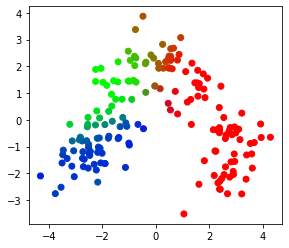

-----iteration--- 4


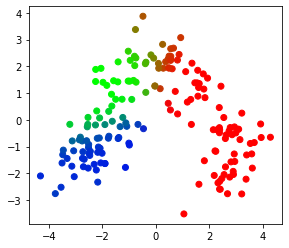

-----iteration--- 5


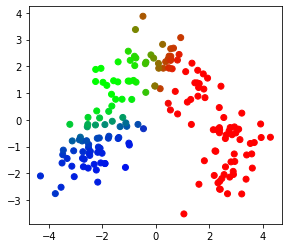

-----iteration--- 6


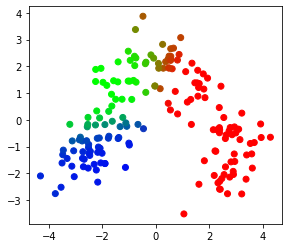

-----iteration--- 7


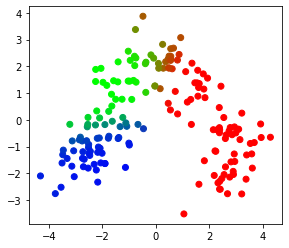

-----iteration--- 8


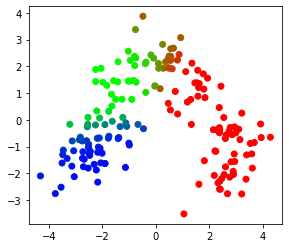

-----iteration--- 9


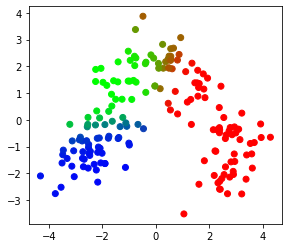

-----iteration--- 10


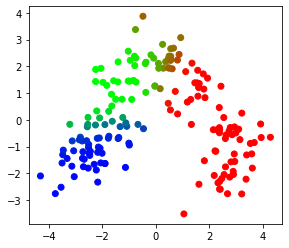

-----iteration--- 11


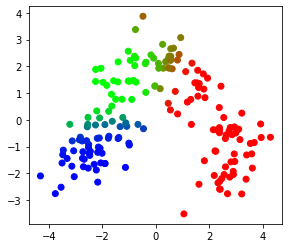

-----iteration--- 12


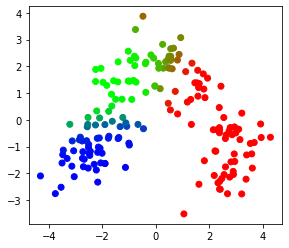

-----iteration--- 13


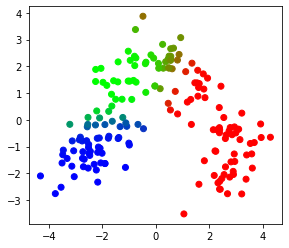

-----iteration--- 14


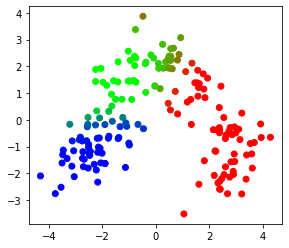

-----iteration--- 15


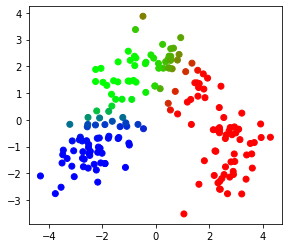

-----iteration--- 16


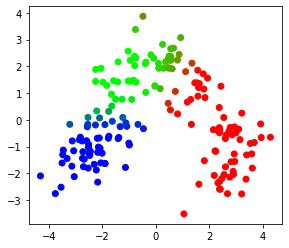

-----iteration--- 17


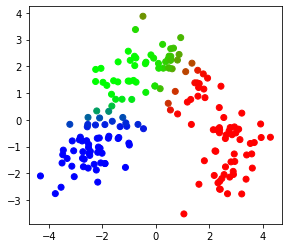

-----iteration--- 18


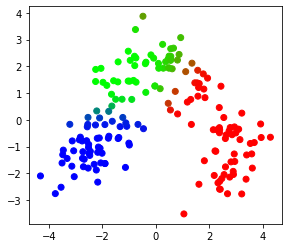

-----iteration--- 19


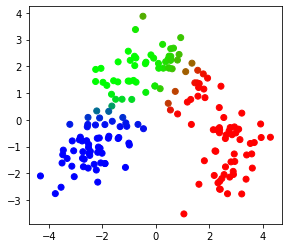

-----iteration--- 20


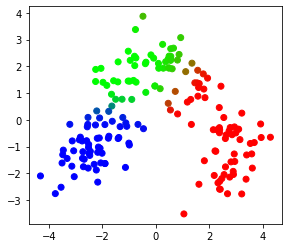

-----iteration--- 21


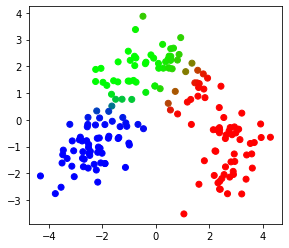

-----iteration--- 22


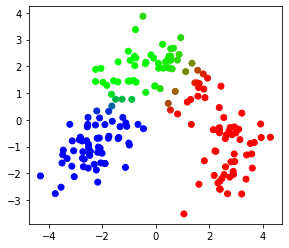

-----iteration--- 23


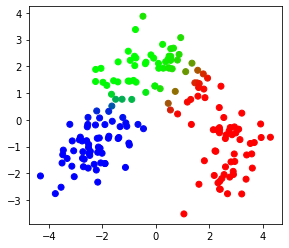

-----iteration--- 24


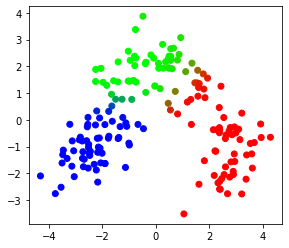

-----iteration--- 25


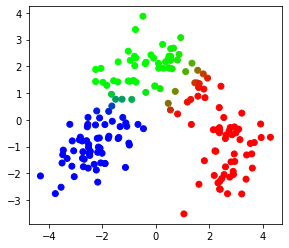

-----iteration--- 26


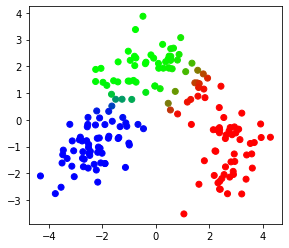

-----iteration--- 27


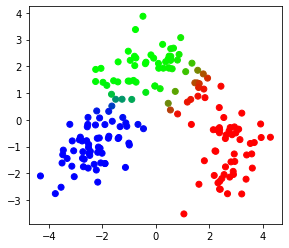

-----iteration--- 28


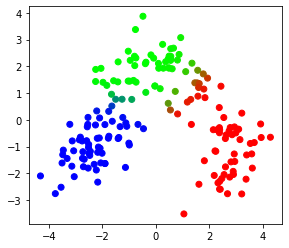

-----iteration--- 29


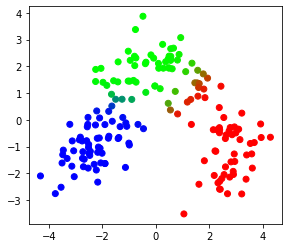

-----iteration--- 30


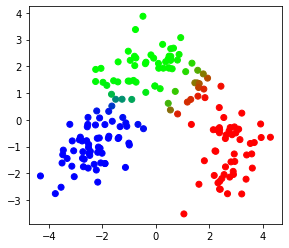

-----iteration--- 31


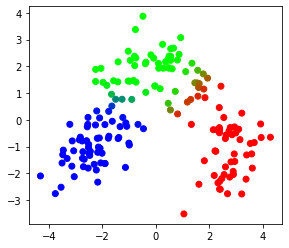

-----iteration--- 32


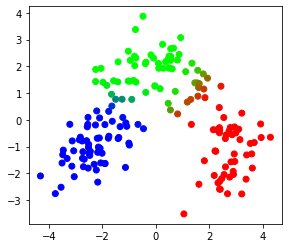

-----iteration--- 33


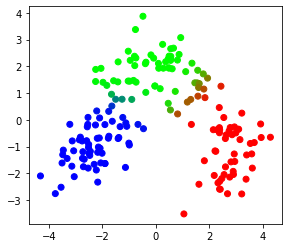

-----iteration--- 34


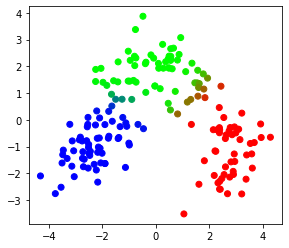

-----iteration--- 35


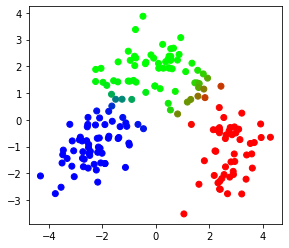

-----iteration--- 36


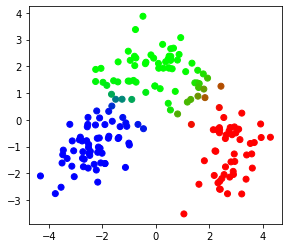

-----iteration--- 37


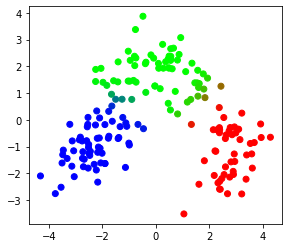

-----iteration--- 38


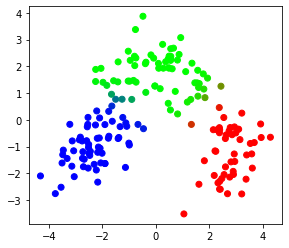

-----iteration--- 39


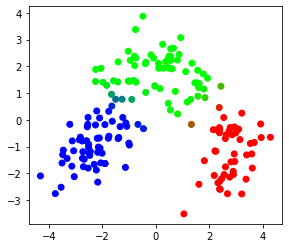

-----iteration--- 40


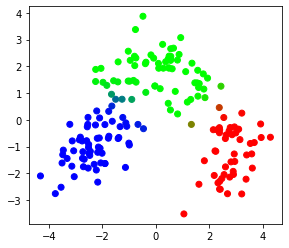

-----iteration--- 41


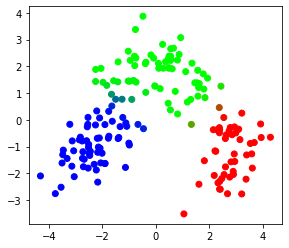

-----iteration--- 42


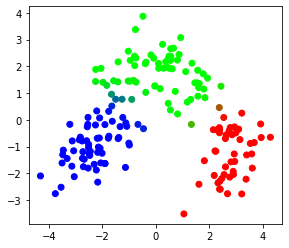

-----iteration--- 43


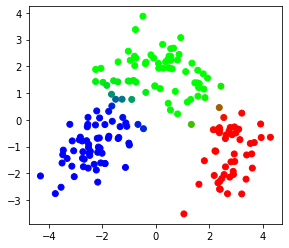

-----iteration--- 44


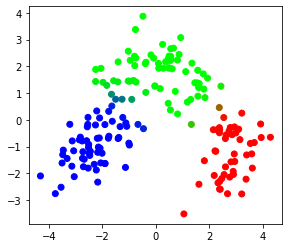

-----iteration--- 45


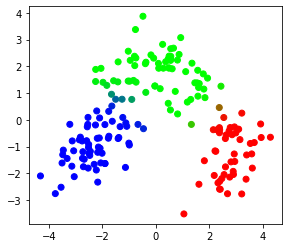

-----iteration--- 46


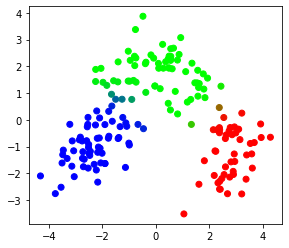

-----iteration--- 47


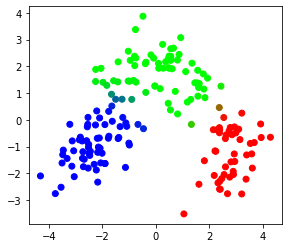

-----iteration--- 48


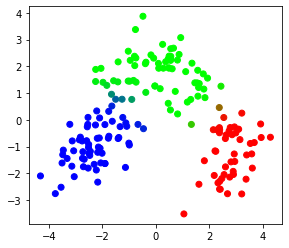

training coverged


In [58]:
import numpy as np
import numpy.matlib
import pandas as pd
from scipy.stats import multivariate_normal as mvn

import matplotlib.pyplot as plt
from sklearn import preprocessing
# import random


data = pd.read_csv('examples/module7_EM-GMM/wine.csv',header=None).to_numpy()
y = data[:,0]
data = data[:,1:]

ndata = preprocessing.scale(data)
m, n = ndata.shape
C = np.matmul(ndata.T, ndata)/m

# pca the data
d = 2  # reduced dimension
V,_,_ = np.linalg.svd(C)
V = V[:, :d]

print(f"ndata {ndata.shape}")
print(f"v {V.shape}")
# project the data to the top 2 principal directions
pdata = np.dot(ndata,V)
print(f"second pdata {pdata.shape}")
plt.scatter(pdata[np.where(y == 1),0],pdata[np.where(y == 1),1])
plt.scatter(pdata[np.where(y == 2),0],pdata[np.where(y == 2),1])
plt.scatter(pdata[np.where(y == 3),0],pdata[np.where(y == 3),1])
#plt.show()

# EM-GMM for wine data
# number of mixtures
K = 3

# random seed
seed = 4

# initialize prior
# np.random.seed(seed)
pi = np.random.random(K)
pi = pi/np.sum(pi)

# initial mean and covariance
# np.random.seed(seed)
mu = np.random.randn(K,2)
mu_old = mu.copy()

sigma = []
for ii in range(K):
    # to ensure the covariance psd
    # np.random.seed(seed)
    dummy = np.random.randn(2, 2)
    sigma.append(dummy@dummy.T)
    
# initialize the posterior
tau = np.full((m, K), fill_value=0.)

# # parameter for countour plot
# xrange = np.arange(-5, -5, 0.1)
# yrange = np.arange(-5, -5, 0.1)

# ####
maxIter= 100
tol = 1e-3

plt.ion()
    
for ii in range(100):

    # E-step    
    for kk in range(K):
        tau[:, kk] = pi[kk] * mvn.pdf(pdata, mu[kk], sigma[kk])

    # normalize tau
    sum_tau = np.sum(tau, axis=1)
    sum_tau.shape = (m,1)    
    tau = np.divide(tau, np.tile(sum_tau, (1, K)))
    
    
    # M-step
    for kk in range(K):
        # update prior
        pi[kk] = np.sum(tau[:, kk])/m
        
        # update component mean
        mu[kk] = pdata.T @ tau[:,kk] / np.sum(tau[:,kk], axis = 0)
        
        # update cov matrix
        dummy = pdata - np.tile(mu[kk], (m,1)) # X-mu
        sigma[kk] = dummy.T @ np.diag(tau[:,kk]) @ dummy / np.sum(tau[:,kk], axis = 0)
        
    print('-----iteration---',ii)    
    plt.scatter(pdata[:,0], pdata[:,1], c= tau)
    plt.axis('scaled')
    plt.draw()
    plt.pause(0.1)
    if np.linalg.norm(mu-mu_old) < tol:
        print('training coverged')
        break
    mu_old = mu.copy()
    if ii==99:
        print('max iteration reached')
        break

(-0.5, 27.5, 27.5, -0.5)

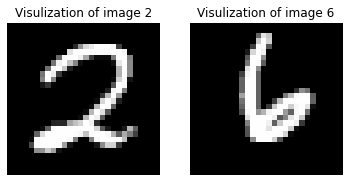

In [60]:
data = pd.read_csv("data/data.dat", sep='\s+',header=None)

plt.subplot(1,2,1)
data_2 = np.reshape(np.array(data.iloc[:,1]),(28,28),order='F')
plt.title("Visulization of image 2")
plt.imshow(data_2,cmap="Greys_r")
plt.axis('off')

plt.subplot(1,2,2)
data_6 = np.reshape(np.array(data.iloc[:,1166]),(28,28),order='F')
plt.title("Visulization of image 6")
plt.imshow(data_6,cmap="Greys_r")
plt.axis('off')